## Homework_16 神经网络基础   



## 第二部分：神经网络基础(5分)

2.1补全下列常用的激活函数及其导数,熟记并画出它们的图像（2分），你也可以查阅资料后补充一些其它常用的激活函数（不计分）

In [1]:
import pandas as pd
import numpy as np

In [2]:
def sigmoid(x):
    #todo
    return 1.0/(1.0 + np.exp(-x))

def d_sigmoid(x):
    #todo
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    #todo
    return np.maximum(0, x)

def d_ReLU(x):
    #todo
    return np.where(x > 0, 1, 0)


def Tanh(x):
    #todo
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def d_Tanh(x):
    #todo
    return 1 - np.tanh(x) ** 2


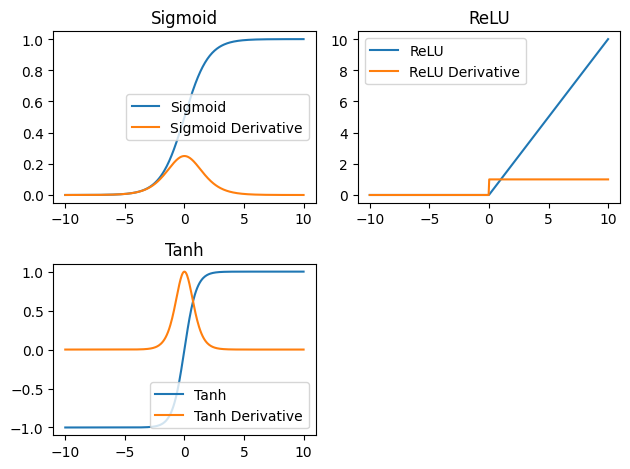

In [3]:
#画出上述常用激活函数与对应导数在区间[-10,10]的图像
#todo
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 400)
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, d_sigmoid(x), label='Sigmoid Derivative')
plt.title('Sigmoid')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, ReLU(x), label='ReLU')
plt.plot(x, d_ReLU(x), label='ReLU Derivative')
plt.title('ReLU')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, Tanh(x), label='Tanh')
plt.plot(x, d_Tanh(x), label='Tanh Derivative')
plt.title('Tanh')
plt.legend()

plt.tight_layout()
plt.show()


2.2使用反向传播算法，用三次函数拟合sin(x)函数在$[-\pi,\pi]$区间的取值（3分）

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

#在区间等距离散采样
x = np.linspace(-math.pi,math.pi,200)
y = np.sin(x)

In [5]:
#初始化a+b*x+c*x^2+d*x^3中的参数a,b,c,d
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-5    #可尝试对比不同的学习率，不计分

In [6]:
for t in range(6000):
    y_pred = a + b*x + c*x**2 + d*x**3
    
    #计算loss（0.5分）
    #todo
    loss = (1/2*np.square(y_pred-y)).sum()
 
    print(t, loss)
    
    #反向传播（1分）
    #todo
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x ).sum()
    grad_c = (grad_y_pred *x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
 
    # 更新参数（1分）
    #todo
    a = a -grad_a*learning_rate
    b = b - grad_b*learning_rate
    c = c - grad_c*learning_rate
    d = d - grad_d*learning_rate
 
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


0 6755.181592640877
1 1366.6639223723373
2 384.809205792822
3 193.4441471526173
4 145.82424628786782
5 125.97574333805815
6 112.84536890838845
7 102.39530932732234
8 93.6719262130138
9 86.30917696150848
10 80.07671616615593
11 74.79431938353451
12 70.31253119897002
13 66.5057854189981
14 63.268290925964386
15 60.510864273990364
16 58.15831297683508
17 56.147238866952385
18 54.42418772862491
19 52.944089477321
20 51.66894305918047
21 50.56670763999292
22 49.610367718128416
23 48.777144879191994
24 48.04783319070282
25 47.40623884323513
26 46.83870768646651
27 46.33372687340426
28 45.88158898857457
29 45.47410885927225
30 45.10438478628612
31 44.76659722669721
32 44.45583905421671
33 44.167972443978705
34 43.89950820561717
35 43.647504043508725
36 43.409478775366594
37 43.18334000604351
38 42.96732314603121
39 42.759939995187636
40 42.55993539134105
41 42.36625065875739
42 42.17799278988062
43 41.994408461055095
44 41.81486212399754
45 41.638817533718004
46 41.4658221738668
47 41.2954941

画出得到的三次函数与sinx在$[-\pi,\pi]$区间内的图像(0.5分)

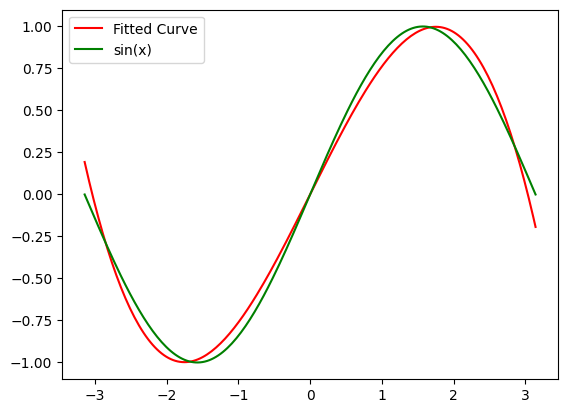

In [7]:
#todo
plt.plot(x, a + b*x + c*x**2 + d*x**3, color='red', label='Fitted Curve')
plt.plot(x, np.sin(x), color='green', label='sin(x)')
plt.legend()
plt.show()